# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
from __future__ import division 

from io import StringIO
import re

from bs4 import BeautifulSoup
import matplotlib.pylab as pl
%pylab inline 

import pandas as pd
import requests

!mkdir -p data
!wget -O data/pops.zip -nc http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
!wget -O data/gdp.zip -nc http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
# the shell magic runs a separte subprocess, so we stay in the same cwd
!cd data; unzip -o pops.zip
!cd data; unzip -o gdp.zip

#f = open("data/API_SP.POP.TOTL_DS2_en_csv_v2.csv", skiprows=4)
pops = pd.read_csv("data/API_SP.POP.TOTL_DS2_en_csv_v2.csv", skiprows=4)
gdps = pd.read_csv("data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv", skiprows=4)

# lol seriously guys? injecting the data into the HTML without a separate endpoint?
if 'ms' not in globals():
    print 'ms not present, rerunning'
    pg = requests.get("https://datawrapper.dwcdn.net/pvLFI/4/").text
    # i know this is awful
    parsed = " ".join(re.findall(r'data:.*', pg)[0].split(" ")[1:])\
                .decode("string_escape")[1:-1]
    f_like = StringIO(unicode(parsed))
    ms = pd.read_csv(f_like)
    # lol
    ms["Country"] = ms["Country"].apply(lambda x: x.split("*")[0])
else:
    print 'ms exists, not redownloading'

# extra credit, yeah?
if 'df' not in globals():
    print "df not existing, rerunning"
    df = pd.read_csv('https://docs.google.com/spreadsheet/ccc?key=1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs&output=csv')
else:
    print 'df exists, not redownloading'


Populating the interactive namespace from numpy and matplotlib
--2017-10-17 19:36:12--  http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.61.247
Connecting to api.worldbank.org (api.worldbank.org)|52.202.61.247|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78921 (77K) [application/zip]
Saving to: ‘data/pops.zip’

100%[======================================>] 78,921      --.-K/s   in 0.03s   

2017-10-17 19:36:14 (2.20 MB/s) - ‘data/pops.zip’ saved [78921/78921]

--2017-10-17 19:36:14--  http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv
Resolving api.worldbank.org (api.worldbank.org)... 52.202.61.247
Connecting to api.worldbank.org (api.worldbank.org)|52.202.61.247|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113874 (111K) [application/zip]
Saving to: ‘data/gdp.zip’

100%[======================================>] 113,874     --.-K

In [2]:
pops_sel = pops[["Country Name", "2012"]].rename(columns={"2012": "pop"})
gdps_sel = gdps[["Country Name", "2012"]].rename(columns={"2012": "gdp"})

df_ = df.merge(pops_sel, left_on="Country/Territory", right_on="Country Name").drop("Country Name", axis=1)\
        .merge(gdps_sel, left_on="Country/Territory", right_on="Country Name")
df_ = df_.merge(ms, right_on="Country", left_on="Country Name")

# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


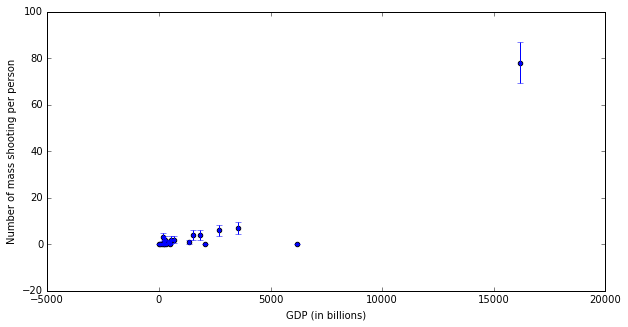

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [3]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

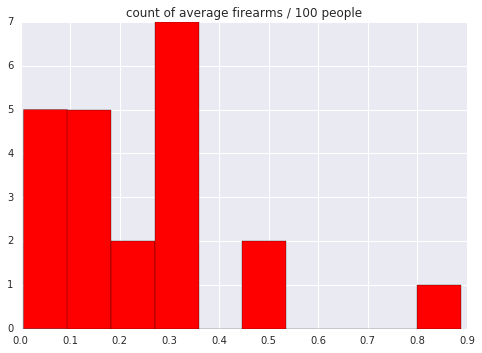

In [56]:
#df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3
df_['firearmspp'] = df_['Average firearms per 100 people'] / 100.
ax = df_['firearmspp'].hist(color='r')
ax.set_title("count of average firearms / 100 people")

### Caption: who could that outlier be? (Hint: answer in the next caption)

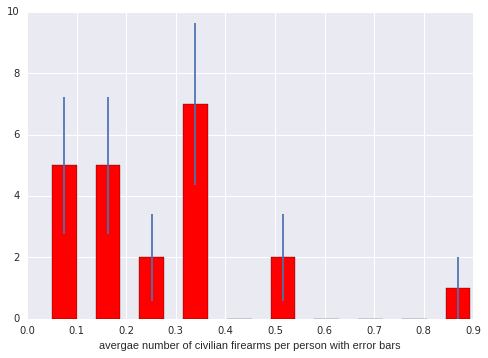

In [54]:
# https://stackoverflow.com/questions/11774822/matplotlib-histogram-with-errorbars
y,binEdges = np.histogram(df_["firearmspp"])
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
width      = 0.05
pl.bar(bincenters, y, width=width, color='r', yerr=menStd)
pl.xlabel("avergae number of civilian firearms per person with error bars")

### Caption: Answer: USA!

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

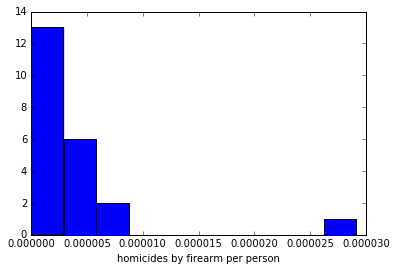

In [19]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / (df_['pop']))
ax.set_xlabel('homicides by firearm per person');

### Caption: we notice one particular outlier...

(-5.8255077807264733e-06, 4.077855446508531e-05)

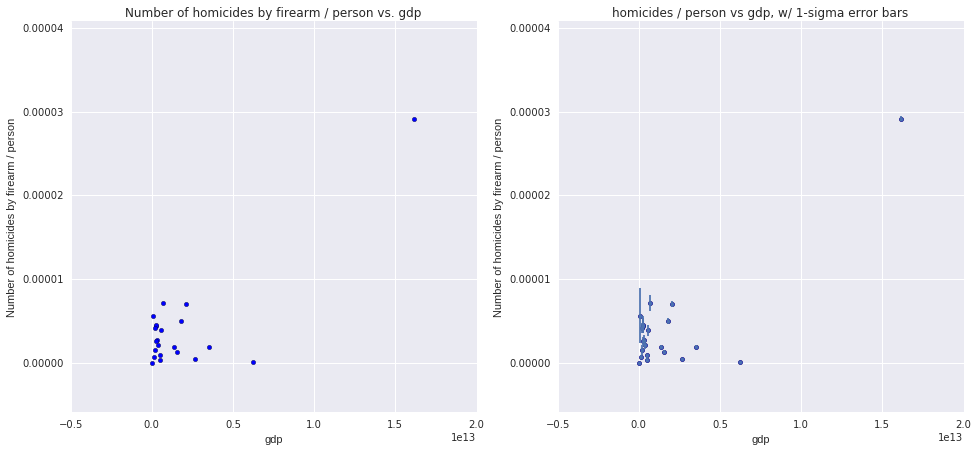

In [53]:
rat_1 = df_["Number of homicides by firearm"]
rat_2 = ((df_['pop']))
y = (rat_1) / (rat_2)
x = df_["gdp"]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
ax1.scatter(x, y)

ax2.scatter(x, y)
# assume this ratio is the probability that someone in population was murdered by gun 
p = y
errs = np.sqrt(p * (1 - p)) / np.sqrt(df_['pop'] * 1.0)
ax2.errorbar(x, y, 
            yerr = errs, fmt = '.')


ax1.set_title("Number of homicides by firearm / person vs. gdp")
ax1.set_ylabel("Number of homicides by firearm / person")
ax1.set_xlabel("gdp")
ax1.set_ylim(-.2 * y.max(), 1.4 * y.max())
ax2.set_title("homicides / person vs gdp, w/ 1-sigma error bars")
ax2.set_ylabel("Number of homicides by firearm / person")
ax2.set_xlabel("gdp")
ax2.set_ylim(-.2 * y.max(), 1.4 * y.max())


### Caption: SO, uh, the error bars. Explanation below.

#### I make the simplifying assumption that the rate of murder is bernoulli - trial is "selecting from the population, was this person murdered by firearm?". Success is "yes". Which is obviously not 100% correct but is close enough for our purposes, I think. 

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


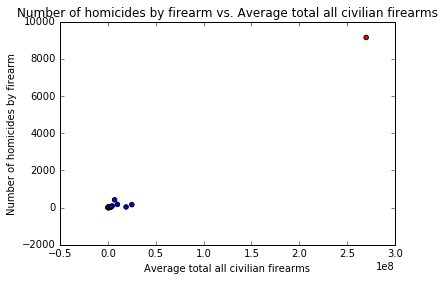

In [32]:
fig, ax = plt.subplots()
y = df_["Number of homicides by firearm"]
x = df_["Average total all civilian firearms"]
ax.scatter(x, y, c=['b'] * (len(x) - 1) + ['r'])
ax.set_title("Number of homicides by firearm vs. Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_xlabel("Average total all civilian firearms")

### Caption: ._.

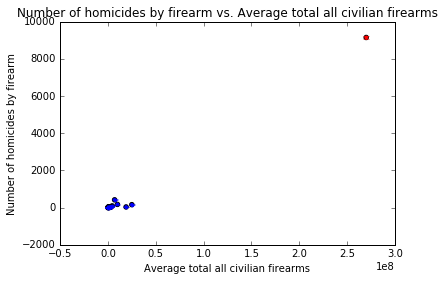

In [35]:
fig, ax = plt.subplots()
y = df_["Number of homicides by firearm"]
x = df_["Average total all civilian firearms"]
colors = ['b'] * (len(x) - 1) + ['r']
ax.scatter(x, y, c=colors)

# for some reason i cant pass in a list of colors to this one...
ax.errorbar(x[:-1], y[:-1], 
            yerr = np.sqrt(y[:-1]), ecolor='b', color='b', fmt = '.')
ax.errorbar(x[-1:], y[-1:], 
            yerr = np.sqrt(y[-1:]), ecolor='r', color='r', fmt = '.')
ax.set_title("Number of homicides by firearm vs. Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_xlabel("Average total all civilian firearms")

### Caption: ._.

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


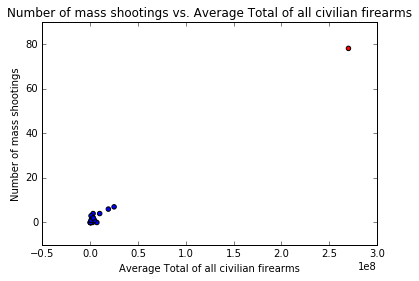

In [38]:
fig, ax = plt.subplots()
y = df_["Number of mass shootings"]
x = df_["Average total all civilian firearms"]
colors = ['b'] * (len(x) - 1) + ['r']
ax.scatter(x, y, c=colors)
ax.set_title("Number of mass shootings vs. Average Total of all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_xlabel("Average Total of all civilian firearms")

### Caption: -_-

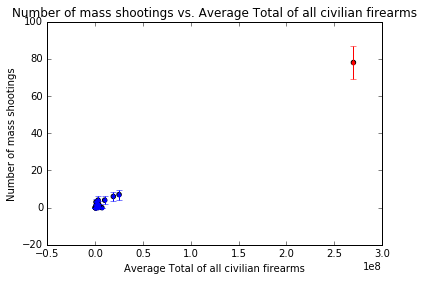

In [39]:
fig, ax = plt.subplots()
y = df_["Number of mass shootings"]
x = df_["Average total all civilian firearms"]
colors = ['b'] * (len(x) - 1) + ['r']
ax.scatter(x, y, c=colors)

# for some reason i cant pass in a list of colors to this one for the dots...
ax.errorbar(x[:-1], y[:-1], 
            yerr = np.sqrt(y[:-1]), ecolor='b', color='b', fmt = '.')
ax.errorbar(x[-1:], y[-1:], 
            yerr = np.sqrt(y[-1:]), ecolor='r', color='r', fmt = '.')
ax.set_title("Number of mass shootings vs. Average Total of all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_xlabel("Average Total of all civilian firearms")

### Caption: Welp...

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    

const   -9.714451e-17
NaN      4.461657e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        19:55:01   Log-Likelihood:                -28.263
No. Observations:                  22   AIC:                             60.53
Df Residuals:                      20   BIC:                             62.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const      -9.714e-17      0.196  -4.97e-16      1.000        -0.408     0.408
None           0.4462      0.200      2.230      0.037         0.029     0.864
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

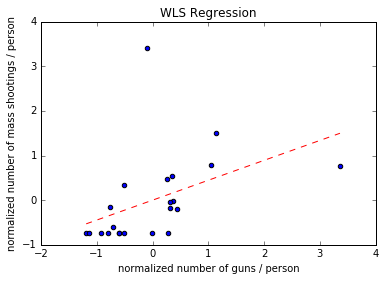

In [40]:
import statsmodels.regression.linear_model as lm

y = df_["Number of mass shootings"] / df_["pop"]
x = df_["Average total all civilian firearms"] / df_["pop"]
y_norm = (y - y.mean()) / y.std(ddof=1)
x_norm = (x - x.mean()) / x.std(ddof=1)
df_["x_norm"] = x_norm
df_["y_norm"] = y_norm
res = lm.OLS(y_norm, lm.add_constant(x_norm)).fit()
print res.params
plt.scatter(x_norm, y_norm)
# just so red line doesnt get ugly
xr = np.linspace(x_norm.min(), x_norm.max(), 10)
plt.plot(xr, np.dot(lm.add_constant(xr), res.params), 'r--')
plt.title("WLS Regression")
plt.xlabel("normalized number of guns / person")
plt.ylabel("normalized number of mass shootings / person")
res.summary()

### Caption: The regression line runs through our scatterplot showing the predicted values. R^2 is .199

    - statsmodels WLS   

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.261
Model:                            WLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     7.054
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0152
Time:                        19:55:04   Log-Likelihood:                -20.431
No. Observations:                  22   AIC:                             44.86
Df Residuals:                      20   BIC:                             47.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.1090      0.123     -0.885      0.387        -0.366     0.148
None           0.4064      0.153      2.656      0.015         0.087     0.726
==============================================================================
Omnibus:                       20.490   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.987
Skew:                           1.866   Prob(JB):                     2.28e-06
Kurtosis:                       6.797   Cond. No.                         1.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

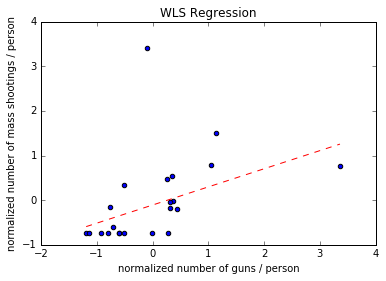

In [41]:
import statsmodels.regression.linear_model as lm

#residuals = 
res = lm.WLS(y_norm, lm.add_constant(x_norm), weights= 1.0 / np.sqrt(np.abs(y_norm))).fit()

# just so red line doesnt get ugly
xr = np.linspace(x_norm.min(), x_norm.max(), 10)
plt.scatter(x_norm, y_norm)
plt.plot(xr, np.dot(lm.add_constant(xr), res.params), 'r--')
plt.title("WLS Regression")
plt.xlabel("normalized number of guns / person")
plt.ylabel("normalized number of mass shootings / person")
res.summary()

### Caption: looks the same, metrics are more interesting and this one does better

    - seaborn
    

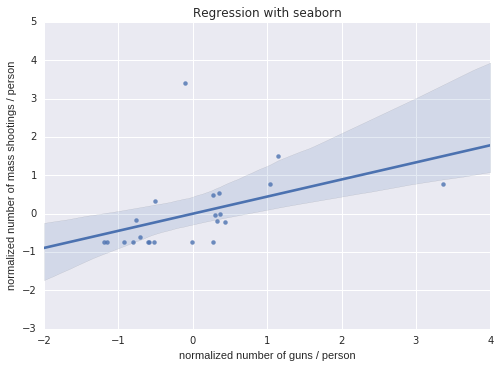

In [42]:
import seaborn  as sns
ax = sns.regplot(x="x_norm", y="y_norm", data=df_);
ax.set_title("Regression with seaborn")
ax.set_xlabel("normalized number of guns / person")
ax.set_ylabel("normalized number of mass shootings / person")

### Caption: ooh, pretty, but I guess seaborn and statsmodels agree? Confidence intervals discussed below.

choose one of
- **creating a function that calculates the residuals and minimizing that function**
- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html

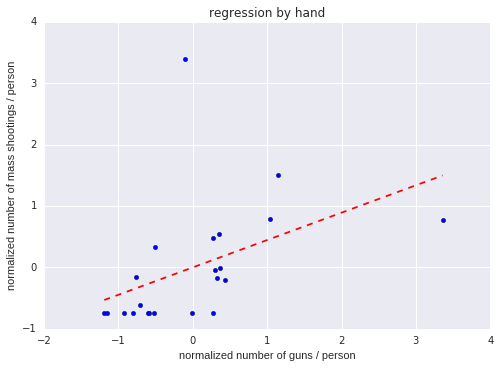

In [43]:
import scipy.optimize as opt
def se(y_obs, x):
    x_int = lm.add_constant(x)
    return lambda w: np.sum((y_obs - np.dot(x_int, w)) ** 2)

# v fast for our nice convex problem
result = opt.minimize(se(y_norm, x_norm), np.array([.1, .1]), method='BFGS')
# just for a nice dotted line
xr = np.linspace(x_norm.min(), x_norm.max(), 10)
plt.scatter(x_norm, y_norm)
plt.plot(xr, np.dot(lm.add_constant(xr), result.x), 'r--')
plt.title("regression by hand")
plt.xlabel("normalized number of guns / person")
plt.ylabel("normalized number of mass shootings / person")

### CAPTION: this visually validates that I did it right because it looks the same as the ones above.

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



In [44]:
import scipy.stats

res = lm.OLS(y_norm, lm.add_constant(x_norm)).fit()

alpha = .05
n = float(len(x_norm))
squared_errors = np.sum((y_norm - res.predict())**2)
sigma = np.sqrt(squared_errors / n)
t = scipy.stats.t.ppf(.95, n - 2) 
slope_ci = t * sigma * np.sqrt(n) / (np.sqrt(n - 2 ) * squared_errors)
int_ci = t * np.sqrt((sigma ** 2) / (n - 2))
int_ci
# lol
print "slope: [{1}, {0}]".format(res.params[0] + slope_ci, res.params[0] - slope_ci)
print "intercept: [{1}, {0}]".format(res.params[0] + int_ci, res.params[0] - int_ci)
print "I have an idea of how to plot this but it'd look dramatically different than the seaborn plot"

slope: [-0.0940360907137, 0.0940360907137]
intercept: [-0.337209974075, 0.337209974075]
I have an idea of how to plot this but it'd look dramatically different than the seaborn plot


In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

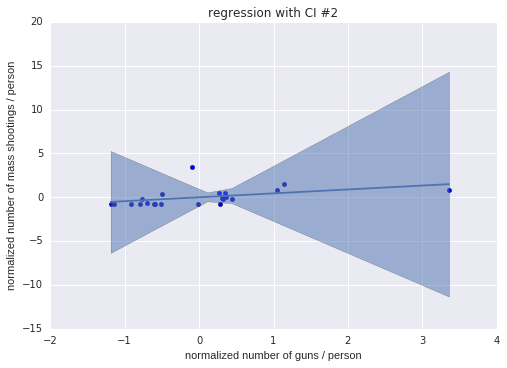

In [47]:
t = scipy.stats.t.ppf(.95, n-2)
# what is this "other term?" we just don't know
mse = np.mean((res.predict() - y) ** 2)
y_int_val = lambda x_k: t * np.sqrt(mse * ((1 / n) + (((x_k - x.mean())**2) / np.var(x))))
xr = np.linspace(x_norm.min(), x_norm.max(), 15)
ci = np.array([y_int_val(x_k) for x_k in xr])
plt.scatter(x_norm, y_norm)
pred = np.dot(lm.add_constant(xr), res.params)
plt.plot(xr, pred)
plt.fill_between(xr, pred - ci, pred + ci, alpha=0.5)
plt.title("regression with CI #2")
plt.xlabel("normalized number of guns / person")
plt.ylabel("normalized number of mass shootings / person")

CAPTION: This looks similar to seaborn, but certainly not identical.

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

In [ ]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

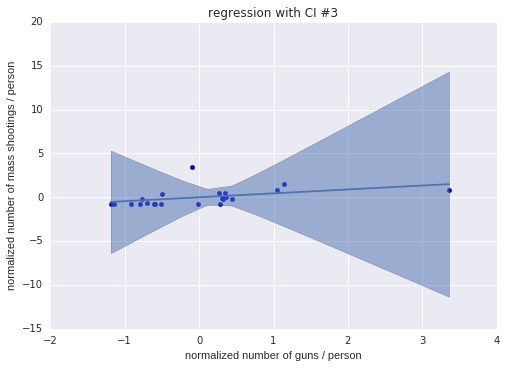

In [49]:
t = scipy.stats.t.ppf(.95, n-2)
# what is this "other term?" we just don't know
mse = np.mean((res.predict() - y) ** 2)
y_int_val = lambda x_k: t * np.sqrt(mse * (1. + (1. / n) + (((x_k - x.mean())**2) / np.var(x))))
xr = np.linspace(x_norm.min(), x_norm.max(), 15)
ci = np.array([y_int_val(x_k) for x_k in xr])
plt.scatter(x_norm, y_norm)
pred = np.dot(lm.add_constant(xr), res.params)
plt.plot(xr, pred)
plt.fill_between(xr, pred - ci, pred + ci, alpha=0.5)
plt.title("regression with CI #3")
plt.xlabel("normalized number of guns / person")
plt.ylabel("normalized number of mass shootings / person")

CAPTION: I like that this one is a little less confident about the errors in the middle (near the X mean I suppose)

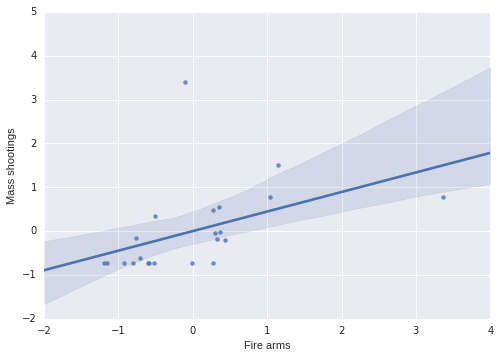

In [50]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x_norm", y="y_norm", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

Though this plot was here before me, I'll remark that seaborn does some fancy bootstrapping stuff to generate its estimate.

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

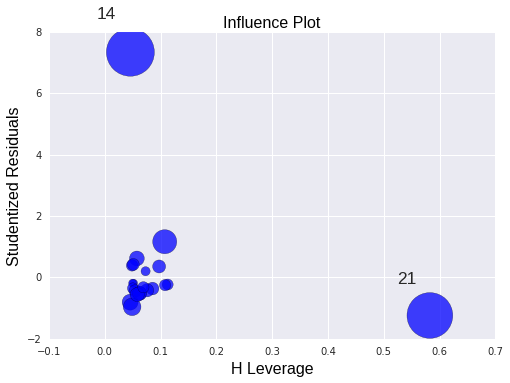

In [51]:
from statsmodels.graphics.regressionplots import influence_plot
res = lm.OLS(y_norm, lm.add_constant(x_norm)).fit()
er = influence_plot(res, alpha  = 0.05, criterion="cooks")

This was here before me, no caption

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

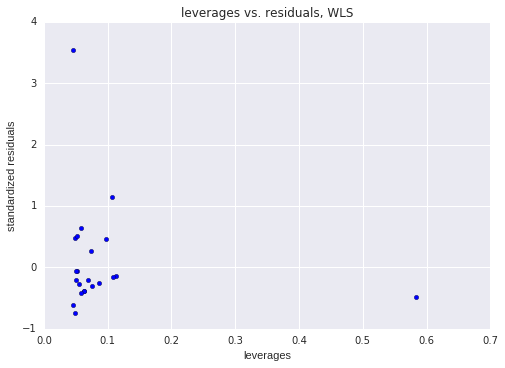

In [52]:
res = lm.WLS(y_norm, lm.add_constant(x_norm), weights= 1.0 / np.sqrt(np.abs(y_norm))).fit()
ses = (x_norm - x_norm.mean())**2
leverages = (1 / n) + ses / np.sum(ses)
residuals = y_norm - res.predict()
residuals_standardized = residuals / np.std(residuals, ddof=1)

plt.scatter(leverages, residuals)
plt.xlabel("leverages")
plt.ylabel("standardized residuals")
plt.title("leverages vs. residuals, WLS")

## Discuss your findings

I standardized my residuals differently, but I think it's fine because they look pretty similar to the statsmodels plot. In general, I don't see any remarkable differences in the WLS plot, they look quite similar to me.